In [1]:
#coding utf-8
#来自kaggle titannic的tutorial：
#https://www.kaggle.com/startupsci/titanic-data-science-solutions
import pandas as pd
import numpy as np

#visualization，emmm，从例子里学，然后随差随学吧，反正可视化就是这两个把这用了
import seaborn as sns   #基于matplotlib的python数据可视化库，提供更高层次的API封装
import matplotlib.pyplot as plt
#这一行可以省略掉plt.show()这一步，在ipython中内嵌画图
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
#决定试一试用jupyter notebook，pycharm自带的，这个的好处是可以随便调代码，玩一玩
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
combine=[train_df,test_df]
#print (combine)

In [3]:
#刚才做的是把表单（里面有训练集和测试集）读进来，下面想看看到底都有啥特征，你可以从数据的介绍里面了解，
#也可以把columns打出来看一看
print (train_df.columns.values)     #这就显出来jupyter notebook的好处了，打印出来的就留在那，正常代码打印出来再运行就没了......

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
#下面看这个特征的分类，tutorial给了一个特征的分类（我觉得参考价值很大，但是这个分类有点迷）：
#categorical（类别特征）：
#  nominal（定类，名义变量，变量不同取值仅代表不同类的事物，性别血型这种）
#  ordinal（定序，有序类别，不仅代表分类，还代表事物按照某种特性的排序，如疗效好中差，教育程度高中低）
#  ratio（定比，有绝对0点，如质量，高度）
#  interval based（定距，变量值之间可以比较大小，两个值的差有实际意义，比如年龄，每月平均收入）
#numerical（数值特征）：
#  discrete（离散特征）
#  continuous（连续特征）
#  timeseries based（时间序列）

#这里面
#Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.
#Continous: Age, Fare. Discrete: SibSp, Parch.

#这个特征可以用各种各样的办法辨别，看特征名字，还有读几行数据看看：
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
train_df.info()
print ("_"*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [7]:
#由上可知如下信息
#  name信息可能会有错误或者打字的错误
#  ticket是字母和字母数字混合的类型组成的。Cabin是字母数字模式混合的类型。
#  Age Cabin Embarked是有缺失值的，Cabin的最多，Age的其次，Embarked的最少。（注意，缺失值和错误不一样啊！）
#  还可以看出来哪些是int型的，哪些是string(object)的

In [8]:
train_df.describe()    #进行一个快速的数据汇总，数值特征的

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_df.describe(percentiles=[.61, .62])      #这个可以看出来生还率大概是38%左右

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
61%,543.900000,0.000000,3.000000,32.000000,0.000000,0.000000,23.225000
62%,552.800000,1.000000,3.000000,32.000000,0.000000,0.000000,24.150000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train_df.describe(percentiles=[.75, .8])   #这个可以看出大部分人（>75%）都没和父母孩子一起在船上

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
80%,713.000000,1.000000,3.000000,41.000000,1.000000,1.000000,39.687500
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
train_df.describe(percentiles=[.68, .69])  #大约百分之三十带了兄弟姐妹和配偶

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
68%,606.200000,1.000000,3.000000,35.000000,0.000000,0.000000,26.307500
69%,615.100000,1.000000,3.000000,35.000000,1.000000,0.000000,26.550000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
train_df.describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]) 
#这个能看出来，65-80岁的人很少（<1%）
#买很贵很贵的票的人也很少，很少有人买四五百块的

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
10%,90.000000,0.000000,1.000000,14.000000,0.000000,0.000000,7.550000
20%,179.000000,0.000000,1.000000,19.000000,0.000000,0.000000,7.854200
30%,268.000000,0.000000,2.000000,22.000000,0.000000,0.000000,8.050000
40%,357.000000,0.000000,2.000000,25.000000,0.000000,0.000000,10.500000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
60%,535.000000,0.000000,3.000000,31.800000,0.000000,0.000000,21.679200


In [13]:
train_df.describe(include=['O'])
#categorical feature的
#没有重名的
#男的比女的多，男的577人
#有七个人用一张票的神奇操作，就是一个票可能几个人用
#Cabin也是，类似于软卧，可能几个人用一个舱
#embarked有3个，大部分人从S港口出发

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Serepeca, Miss. Augusta",male,1601,G6,S
freq,1,577,7,4,644


In [ ]:
Assumtions based on data analysis

We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.


Correlating.

We want to know how well does each feature correlate with Survival. We want to do this early in our project and match these quick correlations with modelled correlations later in the project.


Completing.

We may want to complete Age feature as it is definitely correlated to survival.
We may want to complete the Embarked feature as it may also correlate with survival or another important feature.


Correcting.

Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.
Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
PassengerId may be dropped from training dataset as it does not contribute to survival.
Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.


Creating.

We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.
We may want to engineer the Name feature to extract Title as a new feature.
We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.
We may also want to create a Fare range feature if it helps our analysis.


Classifying.

We may also add to our assumptions based on the problem description noted earlier.
Women (Sex=female) were more likely to have survived.
Children (Age<?) were more likely to have survived. 
The upper-class passengers (Pclass=1) were more likely to have survived.

In [14]:
#下面各种分析都在做上面的事情
#首先，Analyze by pivoting features（我不是太懂这个什么意思）

In [15]:
#   这个表说明，这个Pclass和生还率还是关系很大的,即Pclass特征和goal很相关
#   1里面63%的人生还，2里面47%生还，3里面24%生还，这个是各自Pclass里的生还率啊，不是所有的生还的里每个Pclass占多少比率，加起来不是1！）
train_df[["Pclass","Survived"]].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [16]:
# 这个表说明了，女性的生还率非常高，Sex特征和goal很相关
train_df[["Sex","Survived"]].groupby(["Sex"],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [17]:
#这个SibSp好像有的有关系，有的没关系，所以可能得做一个新特征，比如，家庭关系
train_df[["SibSp","Survived"]].groupby(["SibSp"],as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [18]:
#同理，这个Parch也是,有的有关系，有的没关系，所以可能得做一个新特征，比如，家庭关系
train_df[["Parch","Survived"]].groupby(["Parch"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [19]:
#下面Analyze by visualizing data。一些连续的数值特征，像年龄这种，用直方图看会比较方便

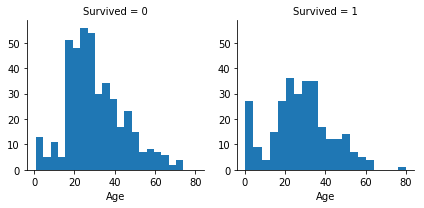

In [20]:
#年龄的图.可以看出:
#  小于4岁的小孩生还率很高
#  老人(80岁那种)都生还了
#  15-25的很多没有生还
#  大多数乘客都是15-35岁
g=sns.FacetGrid(train_df,col='Survived')
g.map(plt.hist,'Age',bins=20)
# 结论:
#  Age特征要考虑
#  Age特征得补全
#  age应该弄成"年龄段"这种

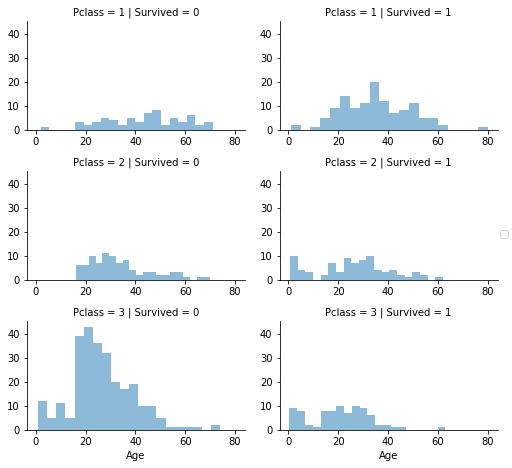

In [21]:
#这个图告诉我们：
#  Pclass是3的人最多，然而活下来的最少
#  Pclass是2和3的Infant（婴幼儿）基本都活下来了
#  Pclass=1的大部分都活下来了
#  各年龄段的都有123等级的
#结论：
# Pclass要考虑
grid=sns.FacetGrid(train_df,col='Survived',row='Pclass',size=2.2,aspect=1.6)
grid.map(plt.hist,'Age',alpha=.5,bins=20)
grid.add_legend();

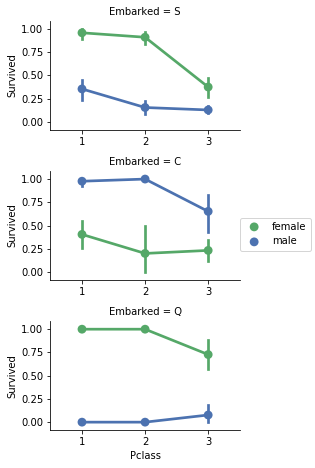

In [22]:
#下面这个图我分析不太出来他说的，但是能得到Sex和Embarked信息要加进来的结论
# Observations.
# Female passengers had much better survival rate than males. Confirms classifying (#1).
# Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.
# Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports. Completing (#2).
# Ports of embarkation have varying survival rates for Pclass=3 and among male passengers. Correlating (#1).
# Decisions.
# Add Sex feature to model training.
# Complete and add Embarked feature to model training.
grid=sns.FacetGrid(train_df,row='Embarked',size=2.2,aspect=1.6)
grid.map(sns.pointplot,'Pclass','Survived','Sex',palette='deep')
grid.add_legend()

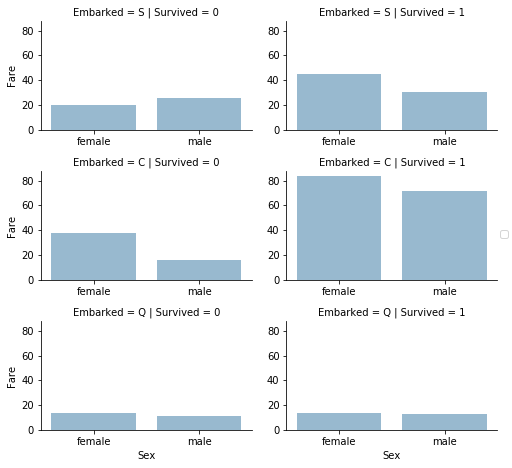

In [23]:
#下面这个图，说明fare（买票的钱）越高存活率越高
#不同的embark和fare和存活率相关，比如C港可能这个地方的Pclass=1的人多，然后Fare也多......
grid=sns.FacetGrid(train_df,row='Embarked',col='Survived',size=2.2,aspect=1.6)
grid.map(sns.barplot,'Sex','Fare',alpha=.5,ci=None)
grid.add_legend()

In [24]:
##############上面的都还是分析，下面开始执行一些具体的correcting，creating，completing操作#############
#首先，ticket和cabin这两个特征不要了
print ("Before",train_df.shape,combine[0].shape,combine[1].shape)
train_df.drop(['Ticket','Cabin'],axis=1,inplace=True)
test_df.drop(['Ticket','Cabin'],axis=1,inplace=True)
combine=[train_df,test_df]
print ("After",train_df.shape,test_df.shape,combine[0].shape,combine[1].shape)

Before (891, 12) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


In [25]:
#关于名字信息，抽取出来“Title”看看能不能用。用正则表达式。([A-Za-z]+)\.这个意思是匹配XXXX.这种，XXXX是大小写字母
#那个crosstab是交叉表，按指定的行和列统计分组频数。
for dataset in combine:
    dataset["Title"]=dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)
pd.crosstab(train_df['Title'],train_df['Sex'])    #这里也得看下test，test里面有一个Dona，这里就没有

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [26]:
#有些title的全活下来或者全没有
train_df[["Title","Survived"]].groupby(["Title"],as_index=False).mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Countess,1.000000
3,Don,0.000000
4,Dr,0.428571
5,Jonkheer,0.000000
6,Lady,1.000000
7,Major,0.500000
8,Master,0.575000
9,Miss,0.697802


In [27]:
#把那些称呼很少的都换成“Rare”，还有些同义的称呼，都换成一个
for dataset in combine:
    dataset['Title'].replace(['Lady','Countess','Capt','Col',\
                              'Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare',inplace=True)
    dataset['Title'].replace('Mlle','Miss',inplace=True)
    dataset['Title'].replace('Ms','Miss',inplace=True)
    dataset['Title'].replace('Mme','Mrs',inplace=True)
train_df[["Title","Survived"]].groupby(["Title"],as_index=False).mean()
#不同title存活率还是不一样的,联系下面不同title划分的Age band,不同title,不同age band的年龄段存活率还是有一些不一样的

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [28]:
#把Categorical换成ordinal的特征
title_mapping={"Mr":1,"Miss":2,"Mrs":3,"Master":4,"Rare":5}      
for dataset in combine:
    dataset['Title']=dataset['Title'].map(title_mapping)
    dataset['Title']=dataset['Title'].fillna(0)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [29]:
#这个可以看出来，这个Title可以把年龄段分的比较明白，比如那个我不知道是什么意思的Master是5岁以下的
combine[0][["Title","Age"]].groupby(["Title"],as_index=False).mean()

,Title,Age
0,1,32.368090
1,2,21.845638
2,3,35.788991
3,4,4.574167
4,5,45.545455


In [30]:
#上面做的事是creat了一个title的特征

In [31]:
#下面把name还有train的passengerId去掉
combine[0].drop(["Name","PassengerId"],axis=1,inplace=True)
combine[1].drop(["Name"],axis=1,inplace=True)
print (combine[0].shape)
print (combine[1].shape)

(891, 9)
(418, 9)


In [32]:
#下面把性别特征变成0和1这种
for dataset in combine:
    dataset["Sex"]=dataset["Sex"].map({"female":1,"male":0}).astype(int)
combine[0].head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [33]:
#弄Age特征

In [34]:
#首先，缺失值填充
#可以用所有年龄的均值和方差，用符合这个均值和方差的随机数填充
#也可以看这个人属于哪个Pclass和Sex，用这个Pclass和Sex的中位数填充
#也可以根据这个人的Pclass和Sex的均值和方差，生成随机数填充（策略1和策略2的结合）
#策略1和策略3会产生噪声，这里用策略2

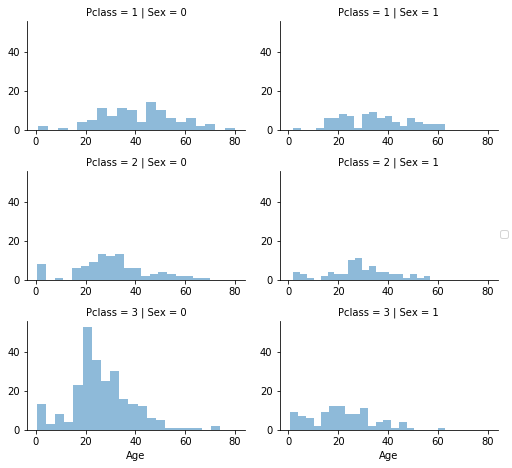

In [35]:
grid=sns.FacetGrid(train_df,row='Pclass',col='Sex',size=2.2,aspect=1.6)
grid.map(plt.hist,'Age',alpha=.5,bins=20)
grid.add_legend()

In [36]:
guess_ages=np.zeros((2,3))    #性别*等级，一共六个，把每个的中位数算出来放在这。这个操作完就把Age补全了
for dataset in combine:
    for i in range(2):
        for j in range(3):
            age_guess=dataset[(dataset['Sex']==i)&(dataset['Pclass']==j+1)]['Age'].dropna().median()
            guess_ages[i,j]=int(age_guess/0.5+0.5)*0.5
            dataset.loc[(dataset.Age.isnull())&(dataset.Sex==i)*(dataset.Pclass==j+1),'Age']=guess_ages[i,j]
    dataset['Age']=dataset['Age'].astype(int)
train_df.head()

F:\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [37]:
#create age band
#所以这个train_df,test_df和combine，改了前两个combine也会改。然后train_df是用来看怎么操作合适的，然后train和test都应用
train_df['Ageband']=pd.cut(train_df['Age'],5)
train_df[['Ageband','Survived']].groupby(['Ageband'],as_index=False).mean().sort_values(by='Ageband',ascending=True)


,Ageband,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [38]:
for dataset in combine:
    dataset.loc[dataset['Age']<=16,'Age']=0
    dataset.loc[(dataset['Age']>16)&(dataset['Age']<=32),'Age']=1
    dataset.loc[(dataset['Age']>32)&(dataset['Age']<=48),'Age']=2
    dataset.loc[(dataset['Age']>48)&(dataset['Age']<=64),'Age']=3
    dataset.loc[dataset['Age']>64,'Age']=4
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Ageband
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [39]:
train_df.drop(['Ageband'],axis=1,inplace=True)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [40]:
combine[0].head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [41]:
#下面根据SibSp和Parch创造家庭关系的新特征
for dataset in combine:
    dataset['FamilySize']=dataset['SibSp']+dataset['Parch']+1   #+1是算上自己
train_df[['FamilySize','Survived']].groupby(['FamilySize'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [42]:
#创造一个isAlone的标签
for dataset in combine:
    dataset['isAlone']=0
    dataset.loc[dataset['FamilySize']==1,'isAlone']=1
train_df[['isAlone','Survived']].groupby(['isAlone'],as_index=False).mean()

,isAlone,Survived
0,0,0.505650
1,1,0.303538


In [43]:
#虽然我不是很理解，为啥有了isAlone，别的就都不要了......
for dataset in combine:
    dataset.drop(['Parch','SibSp','FamilySize'],axis=1,inplace=True)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,isAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [44]:
#再创造一个Pclass和Age组合的特征,虽然这个组合法我不是很赞同，我觉得应该，一共3*5=15种分类，然后就弄成0到14这种......
for dataset in combine:
    dataset['Age*Pclass']=dataset['Age']*dataset['Pclass']
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,isAlone,Age*Pclass
0,0,3,0,1,7.2500,S,1,0,3
1,1,1,1,2,71.2833,C,3,0,2
2,1,3,1,1,7.9250,S,2,1,3
3,1,1,1,2,53.1000,S,3,0,2
4,0,3,0,2,8.0500,S,1,1,6
5,0,3,0,1,8.4583,Q,1,1,3
6,0,1,0,3,51.8625,S,1,1,3
7,0,3,0,0,21.0750,S,4,0,0
8,1,3,1,1,11.1333,S,3,0,3
9,1,2,1,0,30.0708,C,3,0,0


In [45]:
freq_port=train_df.Embarked.dropna().mode()[0]      #mode是众数，返回出现次数最多的那个
freq_port

'S'

In [46]:
#embarked缺的不多，缺的直接补出现频率最高的那个类别就行
for dataset in combine:
    dataset['Embarked'].fillna(freq_port,inplace=True)
train_df[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [47]:
#然后把这个Embarked也变成数字
for dataset in combine:
    dataset['Embarked']=dataset['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,isAlone,Age*Pclass
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [48]:
#处理fare。缺失值直接用中位数填
test_df['Fare'].fillna(test_df['Fare'].dropna().median(),inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,isAlone,Age*Pclass
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [49]:
#注意这里fareband用了pcut，和ageband不一样
#这个ageband，用cut分的band年龄格是均匀的，但是每个格里面的人数不一样
#这个fareband，用pcut分，这个fare格是不均匀的，但是每个格的人数都一样
train_df['FareBand']=pd.qcut(train_df['Fare'],4)
train_df[['FareBand','Survived']].groupby(['FareBand'],as_index=False).mean().sort_values(by='Survived',ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [50]:
#再把
for dataset in combine:
    dataset.loc[dataset['Fare']<=7.91,'Fare']=0
    dataset.loc[(dataset['Fare']>7.91)&(dataset['Fare']<=14.454),'Fare']=1
    dataset.loc[(dataset['Fare']>14.454)&(dataset['Fare']<=31.0),'Fare']=2
    dataset.loc[(dataset['Fare']>31.0),'Fare']=3
    dataset['Fare']=dataset['Fare'].astype(int)
train_df.drop(['FareBand'],axis=1,inplace=True)
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,isAlone,Age*Pclass
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [51]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,isAlone,Age*Pclass
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


In [52]:
#到这就算是把数据都处理完了

In [53]:
#注意pandas的引用和复制，之前的combine就是train_df和test_df的引用
#训练集和测试集的划分
X_train=train_df.drop("Survived",axis=1)
Y_train=train_df["Survived"]
X_test=test_df.drop("PassengerId",axis=1)
X_train.shape,Y_train.shape,X_test.shape

((891, 8), (891,), (418, 8))

In [56]:
#逻辑回归很适合都是categorical特征的数据
logreg=LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred=logreg.predict(X_test)
acc_log=round(logreg.score(X_train,Y_train)*100,2)
acc_log

81.260000000000005

In [64]:
#这个coef相当于wx里面的w，就是每个特征的系数
#这个系数，正的就是这个特征的数越大，结果越大，离分类“1”越近；负的就是这个特征的数越大，结果越小，离分类0越近
#然后这个系数的绝对值越大，证明这个特征和结果的相关性越大。
#比如，sex越大（female是1，male是0），生还率越大，这个系数就是正的
#Pclass就是负的，因为Pclass越大阶级越低，生还率就越低
#sex和Pclass都是很有用的特征，是强特征，和结果非常相关，绝对值很大
coeff_df=pd.DataFrame(train_df.columns.delete(0))    #列名，去掉了Survived这一列
coeff_df.columns=['Feature']
coeff_df["Correlation"]=pd.Series(logreg.coef_[0])   
coeff_df.sort_values(by='Correlation',ascending=False)

,Feature,Correlation
1,Sex,2.200978
5,Title,0.414362
4,Embarked,0.281026
6,isAlone,0.262084
3,Fare,-0.022062
7,Age*Pclass,-0.085959
2,Age,-0.371647
0,Pclass,-1.083515


In [65]:
#SVM
#Next we model using Support Vector Machines which are supervised learning models
#with associated learning algorithms that analyze data used for classification
#and regression analysis. Given a set of training samples, each marked as belonging to 
#one or the other of two categories, an SVM training algorithm builds a model 
#that assigns new test samples to one category or the other, making it a 
#non-probabilistic binary linear classifier. 
svc=SVC()
svc.fit(X_train,Y_train)
Y_pred=svc.predict(X_test)
acc_svc=round(svc.score(X_train,Y_train)*100,2)
acc_svc

83.5

In [66]:
#KNN
#In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) 
#is a non-parametric method used for classification and regression. A sample 
#is classified by a majority vote of its neighbors, with the sample being assigned to 
#the class most common among its k nearest neighbors (k is a positive integer, typically small).
#If k = 1, then the object is simply assigned to the class of that single nearest neighbor. 
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
Y_pred=knn.predict(X_test)
acc_knn=round(knn.score(X_train,Y_train)*100,2)
acc_knn

84.060000000000002

In [67]:
#Bayes classifiers
# Gaussian Naive Bayes
#In machine learning, naive Bayes classifiers are a family of simple 
#probabilistic classifiers based on applying Bayes' theorem with strong (naive) 
#independence assumptions between the features. Naive Bayes classifiers are 
#highly scalable, requiring a number of parameters linear in the number of 
#variables (features) in a learning problem.
gaussian=GaussianNB()
gaussian.fit(X_train,Y_train)
Y_pred=gaussian.predict(X_test)
acc_gaussian=round(gaussian.score(X_train,Y_train)*100,2)
acc_gaussian

76.879999999999995

In [68]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

F:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


78.790000000000006

In [69]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

79.459999999999994

In [70]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

F:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


74.299999999999997

In [71]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.640000000000001

In [72]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.640000000000001

In [74]:

models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.64
8,Decision Tree,86.64
1,KNN,84.06
0,Support Vector Machines,83.50
2,Logistic Regression,81.26
7,Linear SVC,79.46
5,Perceptron,78.79
4,Naive Bayes,76.88
6,Stochastic Gradient Decent,74.30


In [75]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })

In [76]:
print (submission)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
5            897         0
6            898         1
7            899         0
8            900         1
9            901         0
10           902         0
11           903         1
12           904         1
13           905         0
14           906         1
15           907         1
16           908         0
17           909         0
18           910         0
19           911         0
20           912         0
21           913         1
22           914         1
23           915         1
24           916         1
25           917         0
26           918         1
27           919         0
28           920         1
29           921         0
..           ...       ...
388         1280         0
389         1281         1
390         1282         0
391         1283         1
392         1284         1
3

In [77]:
submission.to_csv('submission.csv', index=False)